# **Deep Learning**

1. Training Neural Networks
2. 

# **1. Training Neural Networks**

## 1.1 Activation Functions

### **1) Sigmoid activation**

![sigmoid](_image/sigmoid.png)

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

앞서 배웠듯이 0 ~ 1 사이 값을 가지는 함수입니다. 그러나 Neural Networks에서 사용하기엔 많은 문제점이 있습니다.

- 기울기 소실
- output의 중간값이 0이 아니다.
- exp()의 연산이 너무 무겁다.

### **2) Softmax activation**

$$P_i = \frac{e^{z_i}}{\sum_{j = 1}^k e^{z_j}}$$

sigmoid가 두 개의 값으로 분류한다면 softmax는 여러 가지 값으로 분류한다. 

### **3) tanh activation**

![tanh](_image/tanh.png)

$$tanh(x) = 2 \times sigmoid(x) - 1$$

-1 ~ 1의 범위를 갖고 있습니다. sigmoid의 문제점 중 하나인 output의 중간값을 0으로 만들었습니다. 그러나 기울기 소실 문제는 여전히 남아있습니다.

### **4) ReLU(Rectified Linear Unit)**

![ReLU](_image/ReLU.png)

$$computes \; f(x) = max(0, x)$$

학습이 굉장히 빠르고 기울기 소실 문제가 사라집니다. output의 중간값이 0은 아니지만 많이 사용됩니다.

## 1.2 Batch Normalization

sigmoid나 tanh에서 중요한 것 중 하나는 기울기가 살아있는 범위에 input 데이터가 들어가야 유의미한 값이 나온다는 것입니다. 그걸 위해 사용하는 방법이 **Batch Normalization** 입니다. 이를 통해 기울기 소실 문제를 해결할 수 있습니다. 

$$\hat{x}^{(k)} = \frac{x^{(k)} - \text{E}[x^{(k)}]}{\sqrt{\text{Var}[x^{(k)}]}}$$

위 식을 통해 평균 0, 분산 1의 input data가 만들어집니다. 

그 후, Neural Network가 데이터에 말맞게 평균과 분산을 조절합니다.

$$y^{(k)} = \gamma^{(k)} \hat{x}^{(k)} + \beta^{(k)}$$

이를 통해 $\gamma$는 표준편차를, $\beta$는 평균을 학습시킨다. 이렇게 $\gamma , \beta$의 최적값을 구하는 것이다.

## 1.3 Optimization Methods

optimization을 위한 방법은 여러가지가 있습니다. 왜냐하면 gradient descent를 그대로 사용하면 변동폭이 너무 크게 일어나기 때문입니다. 이제 하나씩 살펴보겠습니다.

여러 방식들이 어떻게 이루어지는지 gif로 보려면 다음 링크로 접속하여 확인하면 됩니다.
http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html

In [4]:
import numpy as np

x = 5 # input data
dx = 2 # gradient
learning_rate = 0.1 # learning rate

### **1) Gradient Descent(SGD)**

![sgd](_image/sgd.png)

일반적인 방법은 현재 자신의 위치에서 측정한 경사에 따라 움직입니다. 그렇기에 위 그림처럼 진동이 엄청나게 일어납니다.

In [2]:
# Vanilla gradient descent update
x -= learning_rate * dx

### **2) Momentum**

![momentum](_image/momentum.png)

Momentum은 현재 위치에서 측정한 기울기만 사용하지 않습니다. 전에 지나온 기울기들을 계속해서 합산하여 사용합니다. 그렇기 때문에 진동이 큰 방향은 진동 크기를 줄이고 맞는 방향은 더욱 빠르게 가도록 해줍니다. 

기울기를 합산할 때, 예전 기울기의 영향력을 줄이기 위해서 0.8 등의 공비를 계속해서 곱해줍니다. 

<img src = "https://miro.medium.com/max/1000/1*X9SaxFM6_sBOAMY9TaGsKw.png">

이름이 momentum이듯, 관성처럼 local minimum에 머물지 않고 global minimum으로 가도록 만들어줍니다.

이를 코드로 보면 다음과 같습니다.

In [3]:
# Momentum update
mu = 0.8 # 공비
v = 0

v = mu * v - learning_rate * dx
x += v

### **3) Adagrad**

기울기들을 합산할 때, 기울기의 크기가 많이 차이나지 않도록 기울기를 제곱해서 합을 구한다음 루트를 취하여 기울기에 나눠줍니다. 코드를 통해 살펴보겠습니다. 

In [5]:
# Adagrad update
cache = 0

cache += dx**2
x -= learning_rate * dx / (np.sqrt(cache) + 1e-7)

이때 1e-7을 더해주는 이유는 cache가 너무 작아져서 0이 되어 error가 나는 것을 방지하기 위해서입니다.

Adagrad는 방향을 잘 찾아가지만 목표에 도달할수록 나누는 값이 너무 커집니다. 그렇기에 한 번의 가는 거리가 점점 작아지고 속도가 느려지게 됩니다.

그렇기에 Adagrad를 직접 사용하지 않고 이를 활용하는 방법들을 사용합니다.

### **4) RMSProp**

Adagrad에서 decay_rate를추가하여 오래된 기울기들의 영향력을 제거하는 방식을 도입한 것이 RMSProp입니다. 코드로 구현하면 다음과 같습니다.

In [6]:
decay_rate = 0.1

# RMSProp update
cache += decay_rate * cache + (1 - decay_rate) * dx**2
x -= learning_rate * dx / (np.sqrt(cache) + 1e-7)

### **5) Adam**

RMSProp와 Momentum 방식을 합쳐서 사용하는 방법이 Adam입니다. 기본적으로 beta1 = 0.9, beta2 = 0.999, eps = 1e-8을 추천됩니다. 코드로 나타내면 다음과 같습니다.

In [7]:
# Adam upgrade
m, v = 0, 0
beta1, beta2 = 0.9, 0.999

m = beta1 * m + (1 - beta1) * dx
v = beta2 * v + (1 - beta2) * (dx**2)
x -= learning_rate * m / (np.sqrt(v) + 1e-7)

## 1.4 Learning Rate

Learning rate는 gradient descent에서 움직이는 보폭 비율이라고 생각하면 됩니다. 그렇기에 learning rate가 크면 크게크게 학습하고 작으면 차근차근 학습하게 됩니다. learning rate의 크기에 따라 학습 정도를 살펴보면 다음과 같습니다.

![learning_rate](_image/learning_rate.png)

하나씩 살펴보면 먼저 작은 값을 가지면 학습속도가 매우 느립니다. 만약 큰 값을 가진다면 학습속도가 빠르지만 어느 순간부터 학습이 진행되지 않습니다. 왜냐하면 현재 위치와 목표점의 거리보다 보폭이 더 크기 때문입니다. 그리고 만약 매우 큰 값을 가진다면 학습이 될 수 있지만 금방 발산해버립니다.

그렇기 때문에 epoch가 진행될수록 learning rate를 줄이는 방법을 사용합니다.


![learning_rate2](_image/learning_rate2.png)

위 그림처럼 loss가 줄지 않을 때마다 learning rate를 줄여서 학습을 진행합니다. 

learning rate를 늘리거나 줄일 땐, 0.1, 1, 10, 100,... 등 10배씩 키우거나 줄이는 것이 일반적입니다. 또는 $\sqrt{10} \sim 3$을 이용해 3배씩 키우거나 줄입니다.

## 1.5 Ensemble

![ensemble](_image/ensemble.png)


위 그림처럼 여러 가지 모델들의 결과를 합쳐서 하나의 평균값으로 예측하는 것을 Ensemble이라고 합니다. Ensemble은 대체적으로 2 ~ 3% 정도 정답률이 증가합니다.

## 1.6 Regularization

### **1) L1, L2 Regularization**

$$L1 : \sum_k \sum_l \lvert W_{k, l} \rvert \quad (W : \text{weight decay})$$
$$L2 : \sum_k \sum_l (W_{k, l})^2$$
$$Elastic net(\text{L1 + L2}) : \sum_k \sum_l (\beta W_{k, l}^2 + \lvert W_{k, l} \rvert)$$

### **2) Dropout**

한 모델에 여러 뉴런이 있습니다. 이 중 임의로 몇 개의 뉴런을 무시하여 다양한 모델들을 사용하는 결과를 주는, 즉 ensemble 효과를 주는 방법을 Dropout이라고 합니다. 

![dropout](_image/dropout.png)

위 그림처럼 임의의 뉴런을 무시하고 진행하는 방식입니다. 위 방식을 여러번 사용하여 ensemble처럼 모든 모델들의 예측값의 평균을 내서 결과를 예측합니다.

주의할 점은 Dropout했던 모델을 테스트할 때는 모든 노드를 사용한다는 것입니다. 그렇기에 output이 학습할 때보다 크게 나오게 됩니다. 이를 방지하기 위해 학습 때 사용한 노드의 비중만큼만 output에서 가져옵니다.

예를 들어 70%의 뉴런만 사용하여 학습을 진행했다면 실제 테스트할 때도 ouput의 70%를 실제 예측값으로 사용하게 됩니다.

이를 코드로 나타내면 다음과 같습니다.

In [8]:
p = 0.5 # probability of keeping a unit active, higher = less dropout


def train_step(X, W, b):
    """X contains the data"""
    
    # forward pass for example 3-layer neural network
    H1 = np.maximum(0, np.dot(W[0], X) + b[0])
    U1 = np.random.rand(*H1.shape) < p # first dropout mask
    H1 *= U1 # drop
    H2 = np.maximum(0, np.dot(W[1], H1) + b[1])
    U2 = np.random.rand(*H2.shape) < p # second dropout mask
    H2 *= U2 # drop
    out = np.dot(W[2], H2) + b[2]
    
    # backward pass: compute gradients...(not shown)
    # perform parameter update...(not shown)

In [9]:
def predict(X, W, b):
    # ensemble forward pass
    H1 = np.maximum(0, np.dot(W[0], X) + b[0]) * p # scale the activations
    H2 = np.maximum(0, np.dot(W[1], H1) + b[1]) * p # scale the activations
    out = np.dot(W[2], H2) + b[2]

### **3) Data Augmentation**

가진 데이터들이 적을 때나 더 많이 필요할 때, 데이터들을 변형, 회전, 늘림 등의 과정을 통해 데이터를 늘리는 것을 말합니다.

## 실습1. PyTorch Tutorial

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

### **1) Tensor operation**

텐서는 배열이나 행렬과 매우 유사한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력과 출력뿐만 아니라 모델의 파라미터를 나타냅니다.

GPU나 다른 연산 가속을 위한 특수한 하드웨어에서 실행할 수 있다는 점을 제외하면, 텐서는 NumPy의 ndarray와 매우 유사합니다.

이제 텐서에 대한 다양한 구현을 알아보겠습니다.

In [11]:
# 데이터로부터 직접 생성하기
data = [[1, 2], [3, 4]]
x = torch.tensor(data)
x

tensor([[1, 2],
        [3, 4]])

In [12]:
# numpy array로부터 생성하기
np_array = np.array(data)
x = torch.from_numpy(np_array)
x

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)

In [13]:
# tensor에서 numpy array로 변환하기
x.numpy()

array([[1, 2],
       [3, 4]])

In [14]:
# 다른 텐서와 같은 모양의 텐서 초기화하기
x_ones = torch.ones_like(x) # x_data의 속성을 유지합니다.
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x, dtype=torch.float) # x_data의 속성을 덮어씁니다.
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]], dtype=torch.int32) 

Random Tensor: 
 tensor([[0.0851, 0.0584],
        [0.3296, 0.2676]]) 



In [15]:
# 주어진 shape로 초기화하기
shape = (3,4)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.4402, 0.1129, 0.1370, 0.3384],
        [0.3500, 0.0489, 0.0349, 0.6645],
        [0.6792, 0.5942, 0.9422, 0.8516]]) 

Ones Tensor: 
 tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


텐서의 속성은 텐서의 모양, 자료형 및 어느 장치에 저장되는지를 나타냅니다.

In [17]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [20]:
# 현재 노트북은 gpu가 없다

#device = torch.device('cuda')
#tensor = tensor.to(device)
#print(f"Device tensor is stored on: {tensor.device}")

그리고 텐서간의 연산도 가능합니다.

In [21]:
# numpy 식의 인덱싱과 슬라이싱
tensor = torch.ones(3, 4)
tensor[:, 1] = 0
tensor

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [22]:
# 텐서 합치기, 행으로 길어지도록
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [24]:
# 텐서 합치기, 열로 이어지도록
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [25]:
# 텐서 곱하기

# 요소별 곱(element-wise product)을 계산합니다
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")

# 다른 문법:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [26]:
# 텐서 간 행렬 곱셈
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# 다른 문법:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]])


### **2) Autograd**

PyTorch에는 torch.autograd라고 불리는 자동 미분 엔진이 내장되어 있습니다. autograd를 통해 입력 X, 파라미터 W , 그리고 cross-entropy loss를 사용하는 logistic regression model의 gradient를 구하겠습니다.

In [27]:
# 입력 및 파라미터 초기화
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
print(x)
print(y)
print(w)
print(b)

tensor([1., 1., 1., 1., 1.])
tensor([0., 0., 0.])
tensor([[ 0.6696, -1.1055,  0.7509],
        [ 0.2827,  0.7063,  1.1959],
        [ 0.4497,  0.8117,  0.0219],
        [ 0.3535,  0.1437,  1.7595],
        [-0.3871,  0.4001, -1.1086]], requires_grad=True)
tensor([-1.2913,  0.2003,  0.2606], requires_grad=True)


In [28]:
# forward
z = torch.matmul(x,w)+b
z

tensor([0.0770, 1.1566, 2.8803], grad_fn=<AddBackward0>)

PyTorch에서는 node를 크게 2가지 방법의 api를 활용해서 사용합니다.

1. torch.nn
2. torch.nn.functional

torch.nn은 사전에 node를 초기화하고 해당 node에 텐서를 통과시켜 값을 받는 형태지만, torch.nn.functional은 사전에 초기화없이 바로 함수처럼 사용하는 방식입니다.

코딩 스타일에 맞춰서 원하시는 api를 사용하시면 됩니다.

In [29]:
# 비용 함수
loss_fn = torch.nn.BCEWithLogitsLoss()
loss = loss_fn(z, y)
loss

tensor(1.6991, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

In [30]:
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)
loss

tensor(1.6991, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

모델에서 매개변수의 가중치를 최적화하려면 파라미터에 대한 loss function의 도함수(derivative)를 계산해야 합니다. 
이러한 도함수를 계산하기 위해, loss.backward() 를 호출한 다음 w.grad와 b.grad에서 값을 가져옵니다

In [31]:
loss.backward()
print(x.grad)
print(w.grad)
print(b.grad)

None
tensor([[0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156],
        [0.1731, 0.2536, 0.3156]])
tensor([0.1731, 0.2536, 0.3156])


기본적으로, requires_grad=True인 모든 텐서들은 연산 기록을 추적하고 미분 계산을 지원합니다. 그러나 모델을 학습한 뒤 입력 데이터를 단순히 적용하기만 하는 경우와 같이 forward 연산만 필요한 경우에는, 미분 연산을 위한 값들을 저장해두는 것이 속력 및 메모리의 저하를 가져올 수 있습니다. 연산 코드를 torch.no_grad() 블록으로 둘러싸서 미분 추적을 멈출 수 있습니다:

In [32]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


## 실습2. LR vs MLP

이제 MNIS dataset을 활용하여 logistic regression model과 MLP model을 구현해보고 학습 파이프라인을 익혀보겠습니다.

### **1) Import packages**

In [61]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

device = 'cuda' if torch.cuda.is_available is True else 'cpu'
device

'cpu'

### **2) Preprocess Dataset**

In [34]:
# load dataset
mnist = fetch_openml('mnist_784', cache=False)

In [35]:
mnist.data.shape

(70000, 784)

mnist에 존재하는 각각의 사진은 28*28의 픽셀로 구성된 784차원짜리 벡터로 나타나져 있습니다. 각 픽셀은 0~255 사이의 값으로 흰색부터 검은색 사이의 값을 나타냅니다. 

In [37]:
# preprocess dataset
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')
X = X.values
y = y.values
print(X.shape)
print(y.shape)

# scale
X /= 255.0
print(X.min(), X.max())

(70000, 784)
(70000,)
0.0 1.0


In [38]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5)
print(X_train.shape) # 80%
print(y_train.shape)
print(X_val.shape) # 10%
print(y_val.shape)
print(X_test.shape) # 10%
print(y_test.shape)

(56000, 784)
(56000,)
(7000, 784)
(7000,)
(7000, 784)
(7000,)


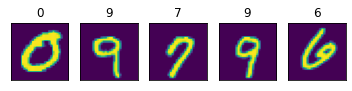

In [41]:
# visualize dataset
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)
        

plot_example(X_train, y_train)

### **3) PyTorch Dataset**

PyTorch에서는 Custom Dataset을 사용하기 위해서는 torch.utils.data.Dataset의 형태로 dataset class를 정의해준 이후, torch.utils.data.DataLoader의 형태로 dataloader class를 정의하여 학습시에 model에 forwarding할 data를 sample해줍니다.

(https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)


가장 보편적으로 사용되는 map-style의 dataset class는 torch.utils.data.Dataset을 superclass로 받아 **getitem()**과 **len()**함수를 override해줍니다.

In [42]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        super(CustomDataset, self).__init__()
        self.X = X
        self.y = y
        
    def __getitem__(self, index):
        x = self.X[index]
        y = self.y[index]
        x = torch.from_numpy(x).float()
        y = torch.from_numpy(np.array(y)).long()
        return x, y

    def __len__(self):
        return len(self.X)

In [43]:
train_dataset = CustomDataset(X_train, y_train)
val_dataset = CustomDataset(X_val, y_val)
test_dataset = CustomDataset(X_test, y_test)

print(len(train_dataset))
print(train_dataset.X.shape)
print(len(val_dataset))
print(val_dataset.X.shape)
print(len(test_dataset))
print(test_dataset.X.shape)

56000
(56000, 784)
7000
(7000, 784)
7000
(7000, 784)


DataLoader는 train 혹은 validation시 dataset에서 batch를 sampling하기 위한 API입니다 (https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

필수적으로 사용하는 option들은 아래와 같습니다.
- dataset: sampling할 dataset
- batch_size: 한번에 sampling할 dataset의 개수
- shuffle: 1 epoch를 기준으로 dataset을 shuffle할지

더 자세한 option은 api를 참고해주세요.

In [44]:
batch_size = 64

# shuffle the train data
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# do not shuffle the val & test data
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# dataset size // batch_size
print(len(train_dataloader))
print(len(val_dataloader))
print(len(test_dataloader))

875
110
110


### **4) Model**

Pytorch에서 model을 선언할 때는 torch.nn.Module class를 superclass로 받아 __init__()함수와 forward() 함수를 작성해줍니다.

__init__()함수에는 모델의 파라미터들을 선언하고, forward함수에는 해당 파라미터들을 이용하여 data를 model에 통과시켜줍니다.

https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [45]:
# Initialize Logistic Regression Model
class LR(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LR, self).__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.fc(x)
        return x

In [46]:
# Initialize MLP Model
class MLP(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

### **5) Train**

이제 선언한 model을 통해 학습을 진행하기 위해선 파라미터를 최적화할 optimizer가 필요합니다. 이번 실습에선 가장 보편적으로 사용되는 Adam optimizer를 사용하겠습니다.

In [47]:
# Trainer
class Trainer():
    def __init__(self, trainloader, valloader, testloader, model, optimizer, criterion, device):
        """
        trainloader: train data's loader
        testloader: test data's loader
        model: model to train
        optimizer: optimizer to update your model
        criterion: loss function
        """
        self.trainloader = trainloader
        self.valloader = valloader
        self.testloader = testloader
        self.model = model
        self.optimizer = optimizer
        self.criterion = criterion
        self.device = device
        
    def train(self, epoch = 1):
        # 학습을 시작하기 위해 model을 train-mode로 변경
        self.model.train()
        for e in range(epoch):
            running_loss = 0.0  
            for i, data in enumerate(self.trainloader, 0): 
                inputs, labels = data 
                # model에 input으로 tensor를 gpu-device로 보낸다
                inputs = inputs.to(self.device)  
                labels = labels.to(self.device)
                # zero the parameter gradients
                # optimizer는 예전 기울기도 계속 저장하기에 기울기를 초기화해준다.
                self.optimizer.zero_grad()    
                # forward + backward + optimize
                # get output after passing through the network
                outputs = self.model(inputs) 
                # compute model's score using the loss function
                loss = self.criterion(outputs, labels)  
                # perform back-propagation from the loss
                loss.backward() 
                # gradient descent를 통해 model의 output을 얻는다.
                self.optimizer.step() 
                running_loss += loss.item()
            
            print('epoch: %d  loss: %.3f' % (e + 1, running_loss / len(self.trainloader)))
            running_loss = 0.0
        val_acc = self.validate()
        return val_acc

    def validate(self):
        # 현재 model이 train-mode일 수 있기에 eval-mode로 바꿔 validate를 수행할 수 있도록 변경
        self.model.eval() 
        correct = 0
        for inputs, labels in self.valloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        return correct / len(self.valloader.dataset)
        
    def test(self):
        self.model.eval() 
        correct = 0
        for inputs, labels in self.testloader:
            inputs = inputs.to(self.device)
            labels = labels.to(self.device)
            output = self.model(inputs) 
            pred = output.max(1, keepdim=True)[1] # get the index of the max 
            correct += pred.eq(labels.view_as(pred)).sum().item()
        return correct / len(self.testloader.dataset)


In [64]:
# Logistic Regression
input_dim = 784
output_dim = 10
epoch = 4

best_acc = 0.0
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
for lr in lrs:
    model = LR(input_dim=input_dim, output_dim=output_dim).to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    trainer = Trainer(train_dataloader, val_dataloader, test_dataloader, model, optimizer, criterion, device)
    val_acc = trainer.train(epoch = epoch)
    print('val_acc: %.3f' %(val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'models/3-1_logistic_model')

trainer.model.load_state_dict(torch.load('models/3-1_logistic_model'))
test_acc = trainer.test()
print('test_acc: %.3f' %(test_acc))

epoch: 1  loss: 1.166
epoch: 2  loss: 1.194
epoch: 3  loss: 1.261
epoch: 4  loss: 1.297
val_acc: 0.886
epoch: 1  loss: 0.356
epoch: 2  loss: 0.305
epoch: 3  loss: 0.296
epoch: 4  loss: 0.294
val_acc: 0.919
epoch: 1  loss: 0.555
epoch: 2  loss: 0.325
epoch: 3  loss: 0.295
epoch: 4  loss: 0.281
val_acc: 0.924
epoch: 1  loss: 1.387
epoch: 2  loss: 0.735
epoch: 3  loss: 0.557
epoch: 4  loss: 0.474
val_acc: 0.893
test_acc: 0.919


In [65]:
# MLP
input_dim = 784
hidden_dim = 32
output_dim = 10
epoch = 4

best_acc = 0.0
lrs = [1e-1, 1e-2, 1e-3, 1e-4]
for lr in lrs:
    model = MLP(input_dim=input_dim, 
                hidden_dim=hidden_dim,
                output_dim=output_dim).to(device)
    criterion = nn.CrossEntropyLoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    trainer = Trainer(train_dataloader, val_dataloader, test_dataloader, model, optimizer, criterion, device)
    val_acc = trainer.train(epoch = epoch)
    print('val_acc: %.3f' %(val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), 'models/3-1_MLP_model')

trainer.model.load_state_dict(torch.load('models/3-1_MLP_model'))
test_acc = trainer.test()
print('test_acc: %.3f' %(test_acc))

epoch: 1  loss: 0.930
epoch: 2  loss: 0.956
epoch: 3  loss: 1.004
epoch: 4  loss: 1.003
val_acc: 0.678
epoch: 1  loss: 0.278
epoch: 2  loss: 0.170
epoch: 3  loss: 0.148
epoch: 4  loss: 0.133
val_acc: 0.956
epoch: 1  loss: 0.472
epoch: 2  loss: 0.254
epoch: 3  loss: 0.206
epoch: 4  loss: 0.173
val_acc: 0.950
epoch: 1  loss: 1.298
epoch: 2  loss: 0.553
epoch: 3  loss: 0.414
epoch: 4  loss: 0.358
val_acc: 0.911
test_acc: 0.953
